Import the necessary libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-09-27 14:20:14.478477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check if GPU is seen

Ask tensorflow to dynamically allocate GPU memory and take only the amount it needs.
This should avoid the 'GPU memory full' error

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    # Currently, memory growth needs to be the same acrros GPUs
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu,True)
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


2023-09-27 14:20:19.977380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3509 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0


Get the training data

In [3]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.  # normalize pixel values to 0-1
x_train = x_train.astype(np.float32)

## Try to figure out what the structure and meaning of the data is

In [4]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [5]:
print(type(x_train[0][0][0]))

<class 'numpy.float32'>


In [6]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000,)


In [7]:
print(type(y_train[0]))

<class 'numpy.uint8'>


We see that there are 60000 images of 28x28 pixels of type uint8
and there are 60000 uint8 

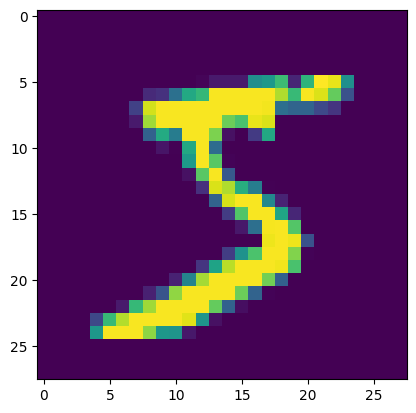

In [8]:
plt.imshow(x_train[0])

<Figure size 640x480 with 0 Axes>

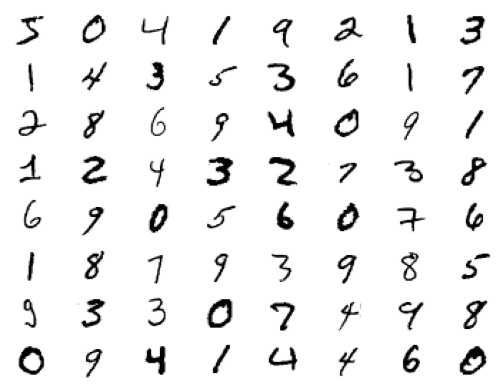

In [9]:
plt.set_cmap('Greys')
fig, axs = plt.subplots(8,8)
for i in range(8):
    for j in range(8):
        axs[i,j].axis('off')
        axs[i,j].imshow(x_train[8*i+j])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

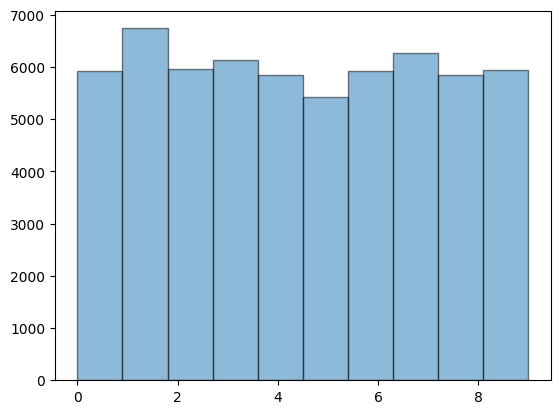

In [10]:
plt.hist(y_train,alpha=0.5, edgecolor='black')

As could be expected, we find 10 different values in the labels array (y_values). In the histogram you see how often
the numbers 0 .. 9 appear.

Now we can start creating the model

In [11]:
units = 20
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(28, 28), name="input"),
      tf.keras.layers.LSTM(units, return_sequences=True),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax, name="output")
  ])

In [12]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 20)            3920      
                                                                 
 flatten (Flatten)           (None, 560)               0         
                                                                 
 output (Dense)              (None, 10)                5610      
                                                                 
Total params: 9530 (37.23 KB)
Trainable params: 9530 (37.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


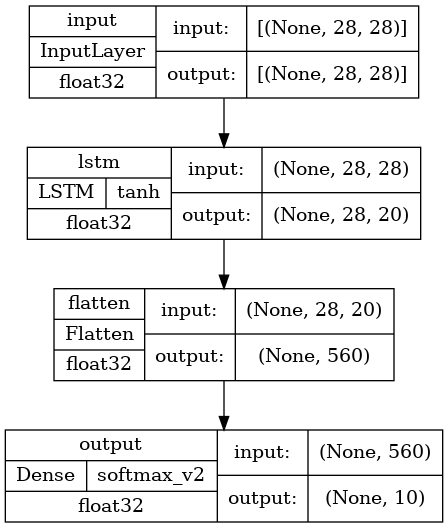

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [14]:
callback = tf.keras.callbacks.EarlyStopping(
      monitor="val_loss",
      patience=3)  #early stop if validation loss does not drop anymore

Train le model taking 20% of the data as validation data and 80% for training

In [15]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[callback])

Epoch 1/20


2023-09-27 14:22:15.346793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-09-27 14:22:15.826880: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feef8f5de00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-27 14:22:15.826978: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 950M, Compute Capability 5.0
2023-09-27 14:22:16.205032: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-27 14:22:17.218095: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 14s 6ms/step - loss: 0.3961 - accuracy: 0.8837 - val_loss: 0.1869 - val_accuracy: 0.9433
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1472 - accuracy: 0.9556 - val_loss: 0.1281 - val_accuracy: 0.9623
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1053 - accuracy: 0.9677 - val_loss: 0.0945 - val_accuracy: 0.9725
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0835 - accuracy: 0.9739 - val_loss: 0.0863 - val_accuracy: 0.9740
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0798 - val_accuracy: 0.9768
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0605 - accuracy: 0.9810 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0684 - val_accuracy: 0.9803
E

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
epochs = range(1,len(history.history['loss'])+1)
loss = history.history['loss']
val_loss = history.history['val_loss']

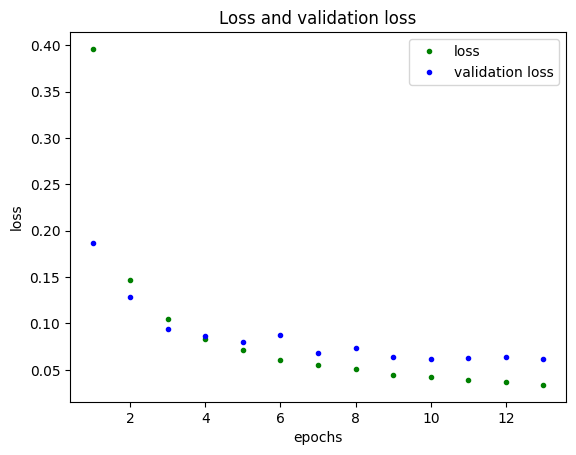

In [18]:
plt.plot(epochs,loss,'g.',label='loss')
plt.plot(epochs,val_loss,'b.',label='validation loss')
plt.title('Loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

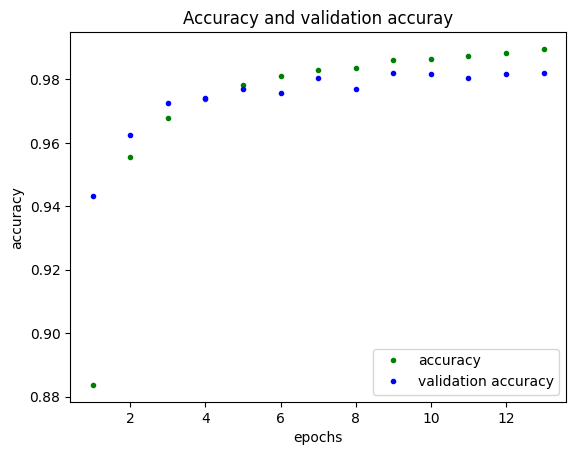

In [20]:
plt.plot(epochs,accuracy,'g.',label='accuracy')
plt.plot(epochs,val_accuracy,'b.',label='validation accuracy')
plt.title('Accuracy and validation accuray')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

The accuracy is over 98% which looks pretty nice

Prepare the trained model with fixed input tensor size for inference

In [21]:
print(model.inputs[0].dtype)

<dtype: 'float32'>


In [22]:
fixed_input =  tf.keras.layers.Input(shape=[28, 28],
                                      batch_size=1,
                                      dtype=model.inputs[0].dtype,
                                      name="fixed_input")
fixed_output = model(fixed_input)
run_model = tf.keras.models.Model(fixed_input, fixed_output)

Now we can save the tensorflow model

In [23]:
run_model.save("models",save_format="tf")

INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets


Convert the tensorflow model into a tflite model

In [ ]:
print(help(tf.lite.TFLiteConverter))

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(run_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpw156k2zq/assets


INFO:tensorflow:Assets written to: /tmp/tmpw156k2zq/assets
2023-09-27 14:26:21.691095: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-27 14:26:21.691172: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-27 14:26:21.692899: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpw156k2zq
2023-09-27 14:26:21.710600: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-09-27 14:26:21.710633: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpw156k2zq
2023-09-27 14:26:21.741834: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-09-27 14:26:21.748755: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-09-27 14:26:21.857195: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [ ]:
tf.lite.experimental.Analyzer.analyze(model_content=tflite_model)

In [25]:
print(type(tflite_model))

<class 'bytes'>


Save the tflite model. This is simply a byte array

In [26]:
save_path = "models/number_model.tflite"
with open(save_path, "wb") as f:
    f.write(tflite_model)

Finally quantize the model to int8 format

In [27]:
def representative_dataset_gen(num_samples=100):
    for data in x_train[:num_samples]:
        yield [data.reshape(1, 28, 28)]

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(run_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
converter.representative_dataset = representative_dataset_gen
int8_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpm9npj7tt/assets


INFO:tensorflow:Assets written to: /tmp/tmpm9npj7tt/assets
/home/uli/.virtualenvs/AI/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-09-27 14:26:54.561928: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-27 14:26:54.561964: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-27 14:26:54.562229: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpm9npj7tt
2023-09-27 14:26:54.571411: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-09-27 14:26:54.571452: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpm9npj7tt
2023-09-27 14:26:54.605790: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-09-27 14:26

In [31]:
save_path = ("models/number_model_quant.tflite")
with open(save_path, "wb") as f:
    f.write(int8_tflite_model)